In [1]:
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
dataset_path = "/content/drive/MyDrive/5Animals"

idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

    # data augmentation

    zoom_range=0.2,
    rotation_range=16,
    horizontal_flip=True

)

train_data = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="training",
    target_size=(224,224),
    # save_to_dir="/content/drive/MyDrive/dataset/animal_test"
)

validation_data = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 1045 images belonging to 5 classes.
Found 258 images belonging to 5 classes.


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(2, 2), activation="relu", padding="same", input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"),
    layers.Conv2D(128, (3, 3),  strides=(1, 1), activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3, 3), strides=(1, 1), activation="relu" , padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3, 3), strides=(1, 1), activation="relu" ),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(1024, activation="tanh"),
    layers.Dense(5, activation="softmax"),
])


In [4]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )


history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=20)



Epoch 1/20
33/33 [==============================] - 190s 5s/step - loss: 1.5830 - accuracy: 0.2947 - val_loss: 1.4941 - val_accuracy: 0.3140
Epoch 2/20
33/33 [==============================] - 170s 5s/step - loss: 1.4094 - accuracy: 0.3914 - val_loss: 1.2911 - val_accuracy: 0.4419
Epoch 3/20
33/33 [==============================] - 171s 5s/step - loss: 1.2334 - accuracy: 0.4718 - val_loss: 1.2070 - val_accuracy: 0.5155
Epoch 4/20
33/33 [==============================] - 176s 5s/step - loss: 1.1685 - accuracy: 0.5187 - val_loss: 1.2638 - val_accuracy: 0.4961
Epoch 5/20
33/33 [==============================] - 172s 5s/step - loss: 1.1185 - accuracy: 0.5359 - val_loss: 1.0864 - val_accuracy: 0.5426
Epoch 6/20
33/33 [==============================] - 170s 5s/step - loss: 1.0299 - accuracy: 0.5770 - val_loss: 1.1971 - val_accuracy: 0.5039
Epoch 7/20
33/33 [==============================] - 174s 5s/step - loss: 1.0531 - accuracy: 0.5895 - val_loss: 1.1463 - val_accuracy: 0.5078
Epoch 8/20
33

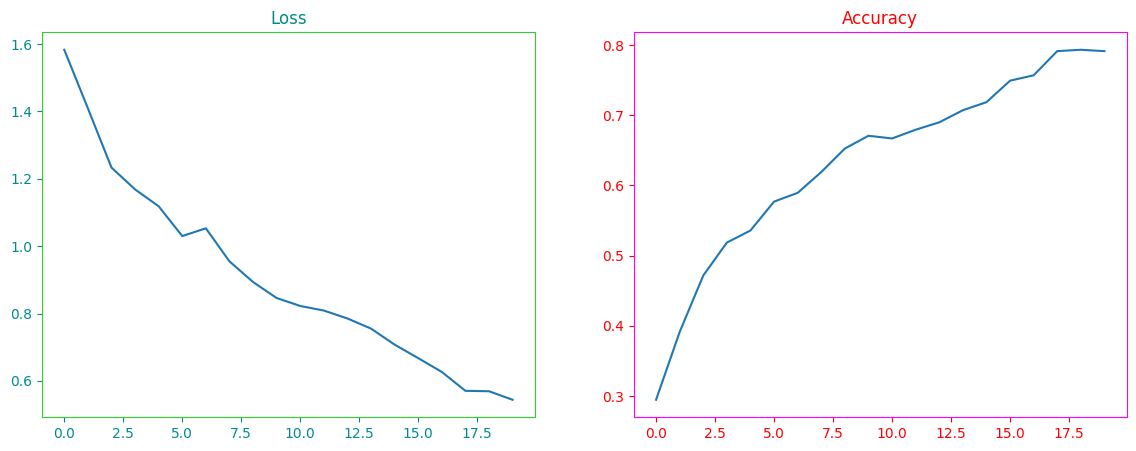

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(history.history['loss'])
ax1.set_title("Loss")
ax1.title.set_color('darkcyan')
ax1.tick_params(axis='x' , colors='darkcyan')
ax1.tick_params(axis='y' , colors='darkcyan')
ax1.spines['bottom'].set_color('limegreen')
ax1.spines['right'].set_color('limegreen')
ax1.spines['left'].set_color('limegreen')
ax1.spines['top'].set_color('limegreen')
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
ax2.title.set_color('red')
ax2.tick_params(axis='x' , colors='red')
ax2.tick_params(axis='y' , colors='red')
ax2.spines['bottom'].set_color('magenta')
ax2.spines['right'].set_color('magenta')
ax2.spines['left'].set_color('magenta')
ax2.spines['top'].set_color('magenta')
plt.show()



In [6]:
model.save('weights/animalـrecognition_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
Y_pred = model.predict(validation_data)
y_predict = np.argmax(Y_pred , axis=1)


9/9 [==============================] - 14s 1s/step


In [8]:
print(validation_data.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


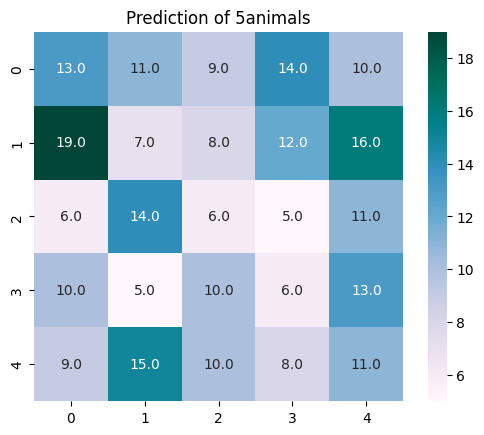

In [9]:
cm = confusion_matrix(validation_data.classes , y_predict)

sns.heatmap(cm , annot=True , cmap='PuBuGn', fmt='.1f')
plt.title("Prediction of 5animals")
plt.imshow(cm)

In [16]:
image = cv2.imread("/content/drive/MyDrive/5Animals/panda/img.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (224,224))
image = image / 255.0
image = image.reshape(1,224,224,3)
output = model.predict(image)
pred = np.argmax(output)

if pred == 0:
    print("🐘")
elif pred == 1:
    print("🐶")
elif pred == 2:
    print("🐈")
elif pred == 3:
    print("🦒")
elif pred == 4:
    print("🐼")


1/1 [==============================] - 0s 58ms/step
🐼
